In [548]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import timeit
%matplotlib inline

In [549]:
st = time.time()
def Matcher(queryImg, dbimg):
    #image1 = cv2.imread(queryImg)
    #image2 = cv2.imread(dbimg)
    
    #qimg = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    #timg = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
    
    qimg = queryImg
    timg = dbimg
    
    qImage = cv2.pyrDown(qimg)
    tImage=cv2.pyrDown(timg)
    num_rows, num_cols = tImage.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
    tImage = cv2.warpAffine(tImage, rotation_matrix, (num_cols, num_rows))
#test_gray = cv2.cvtColor(testImage, cv2.COLOR_RGB2GRAY)
    test_gray = qimg
#train_gray = cv2.cvtColor(trainImage, cv2.COLOR_RGB2GRAY)
    train_gray = timg
    
    fast = cv2.FastFeatureDetector_create()
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    train_keypoints = fast.detect(train_gray,None)
    test_keypoints = fast.detect(test_gray,None)
    train_keypoints, train_descriptors = brief.compute(train_gray,train_keypoints)
    test_keypoints, test_descriptors = brief.compute(test_gray,test_keypoints)
    keypoints_without_size = np.copy(tImage)
    keypoints_with_size = np.copy(tImage)

    #cv2.drawKeypoints(trainImage, train_keypoints, keypoints_without_size, color = (0,255,0))
    #cv2.drawKeypoints(trainImage, train_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = bf.match(train_descriptors,test_descriptors)
    #print("matches -> ",matches)
    matches = sorted(matches, key = lambda x: x.distance)
    #print("\nsoted matches -> ",matches)
    #print("\nMatches -> ",len(matches))
    #result=cv2.drawMatches(trainImage, train_keypoints,test_gray,test_keypoints,matches,test_gray,flags=2)
    #print("matched value->>> ",len(matches))
    return len(matches)

In [550]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
class Onek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq)
        
        
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(702)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(117)]
        act_neg = [0 for _ in range(702)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Fivek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(3504)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(584)]
        act_neg = [0 for _ in range(3504)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq)
        
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Tenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(1167)]
        act_neg = [0 for _ in range(7002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq) 
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Fifteenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp == 0):
            req = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7350)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(1225)]
        act_neg = [0 for _ in range(7350)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq) 
        
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

In [551]:
"""
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
class Onek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(67)]
            act_neg = [0 for _ in range(1002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(67)]
            act_neg = [0 for _ in range(1002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(1002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(67)]
        act_neg = [0 for _ in range(1002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)


class Fivek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(250)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(250)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(3504)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(250)]
        act_neg = [0 for _ in range(3504)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)

class Tenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(500)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(500)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(500)]
        act_neg = [0 for _ in range(7002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
        

class Fifteenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(750)]
            act_neg = [0 for _ in range(10500)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(10500-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp == 0):
            req = 0
        else:
            act_pos = [1 for _ in range(750)]
            act_neg = [0 for _ in range(10500)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(10500)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(750)]
        act_neg = [0 for _ in range(10500)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(10500-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
        """

'\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import f1_score \nclass Onek:\n    def precisionScore(tp,fp):\n        preq = 0\n        if(fp == 0 and tp ==0):\n            preq = 0\n        else:\n            act_pos = [1 for _ in range(67)]\n            act_neg = [0 for _ in range(1002)]\n            y_true = act_pos + act_neg\n            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]\n            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]\n            y_pred = pred_pos +pred_neg\n            preq = precision_score(y_true, y_pred, average="binary")\n        print("Precision: %.3f" % preq)\n    \n    def recallScore(tp,fn):\n        req = 0\n        if(fn == 0 and tp ==0):\n            req = 0\n        else:\n            act_pos = [1 for _ in range(67)]\n            act_neg = [0 for _ in range(1002)]\n            y_true = act_pos + act_neg\n            pred_pos = [0 for _ in range(67-t

In [552]:
# the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    #scale_percent = 50
    #width = int(imageA.shape[1] * scale_percent / 100)
    #height = int(imageA.shape[0] * scale_percent / 100)
        #width2 = int(imageB.shape[1] * scale_percent / 100)
       #height2 = int(imageB.shape[0] * scale_percent / 100)
    
        # dsize
        #dsize = (width, height)
        #output = cv2.resize(src, dsize)
    
        #cv2.imwrite(image,output) 
        
        #print(\"Error %.2f\" %err)
    
    # return the MSE, the lower the error, the more similar
    # the two images are

#st = time.time()
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

In [553]:
retrieved_images=[]
def query():
    queryFn = "I:/Medical Dataset/10pFiveK/Test/Unlabeled/3838.jpeg"
    image1 = cv2.imread(queryFn)
    qimg = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    dataset_path = "I:/Medical Dataset/10pFiveK/Train/"
    f = dataset_path
    names = []
    values=[]
    dataset =[]
    
    TP=[]
    FP=[]
    FN=[]
    print("preparing database files....")
    for file in os.listdir(f):
        fimg = f+file
        names.append(fimg)
        im=cv2.imread(fimg)
        image2 = cv2.imread(fimg)
        timg = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        values.append(Matcher(qimg,timg))
    #imge=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #imge = cv2.resize(im,(64,64),3)
        dataset.append(timg)
    print("Database Ready!")

    pos=0
    plt.subplot(231); plt.imshow(qimg); plt.title("Query Image"); plt.xlabel(os.path.basename(queryFn))
    #print("-----------------------------------------\nploting the resulting histogram(s) \n----------------------------------\n")
#vals = range(len(lbp0))
    plt.figure(figsize=(10,5))
#plt.subplot(232); plt.bar(vals,lbp0);
#plt.title("Histogram of Query Image"); #plt.axis("off")
    valu = 0   
    str_arr=[]
    str_=[]
    precsion=0
    rec=0
    count=0
    pre=0
    #print("len(values) -> ",len(values))
    #print("values[] -> ",values)
    for i in range(len(values)):
        if(values[i] >= 3):
            retrieved_images.append(names[i])
            count+=1
            #tpos = min(lbpf)
            #print("min feature mean value %.3f" %tpos)
            #pos=1
            #print("count true positive -> ", count)
            if("1K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            
            #HeadCT below
                if(int(str_[0]) in range(1,50)):
                    if(int(str_arr[0]) in range(118,234)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #BreastMRI below
                elif(int(str_[0]) in range(51,100)):
                    if(int(str_arr[0]) in range(235,351)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #AbdomenCT below
                elif(int(str_[0]) in range(101,150)):
                    if(int(str_arr[0]) in range(352,468)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(151,200)):
                    if(int(str_arr[0]) in range(469,585)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #Chest
                elif(int(str_[0]) in range(201,250)):
                    if(int(str_arr[0]) in range(1,117)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                 #Hand
                elif(int(str_[0]) in range(251,300)):
                    if(int(str_arr[0]) in range(586,702)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
            elif("5K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            #AbdomenCT below
                if(int(str_[0]) in range(0,249)):
                    if(int(str_arr[0]) in range(1,584)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(251,500)):
                    if(int(str_arr[0]) in range(835,1418)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(501,750)):
                    if(int(str_arr[0]) in range(1669,2252)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(751,1000)):
                    if(int(str_arr[0]) in range(2503,3086)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #HeadCT
                elif(int(str_[0]) in range(1001,1250)):
                    if(int(str_arr[0]) in range(3337,3920)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                 #Hand
                elif(int(str_[0]) in range(1251,1500)):
                    if(int(str_arr[0]) in range(4171,54754)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
            elif("10K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
                #Hand
                if(int(str_[0]) in range(1,500)):
                    if(int(str_arr[0]) in range(1168,2334)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                #HeadCT
                elif(int(str_[0]) in range(501,1000)):
                    if(int(str_arr[0]) in range(3502,4668)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                #CXR
                elif(int(str_[0]) in range(1001,1500)):
                    if(int(str_arr[0]) in range(2335,3501)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
            #AbdomenCT below
                elif(int(str_[0]) in range(1501,2000)):
                    if(int(str_arr[0]) in range(5836,7002)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(2001,2500)):
                    if(int(str_arr[0]) in range(4669,5835)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(2501,3000)):
                    if(int(str_arr[0]) in range(1,1167)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        
                        
                  
                       
                 
            elif("10pFiveK" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            #AbdomenCT below
                if(int(str_[0]) in range(1,525)):
                    if(int(str_arr[0]) in range(1,1225)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(751,1275)):
                    if(int(str_arr[0]) in range(1751,2975)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(1501,2025)):
                    if(int(str_arr[0]) in range(3501,4725)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(2251,2775)):
                    if(int(str_arr[0]) in range(5251,6475)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                 #Hand
                elif(int(str_[0]) in range(3001,3525)):
                    if(int(str_arr[0]) in range(7001,8225)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #HeadCT
                elif(int(str_[0]) in range(3751,4275)):
                    if(int(str_arr[0]) in range(8751,9975)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                
                      
                        
                
            #if(float("{:.3f}".format(tpos)) < lbpf[i]):
                #others+=1
                #print("others -> ",others)
                #print("Total Count -> ",count)
                    #print(f'Accuracy Score i s {accuracy_score(pos,count)}')
            
            sm = len(TP)+len(FP)+len(FN)    
            if("Test" in names[i]):
                print("------------------------------------------------------")
                #count -= 1
               
            else:
                plt.rcParams["figure.max_open_warning"]=50
                plt.figure(figsize=(10,8))
                plt.title("Target Image(s)")
                plt.subplot(233); plt.imshow(dataset[i]); 
                #plt.xlabel("Mean Squared Error %.4f" % (mse(dataTestDir2, dataset[i])))
                plt.ylabel(os.path.basename(names[i]))
            
                #valu = lbpf[i]
                #vals2 = range(len(valu))
                #plt.figure(figsize=(10,5))
                #place += 1
                #plt.subplot(place); plt.bar(vals2,lbpf[i]);
                #plt.title("Histogram of Resulting Image Image");
    #print("Query File Ready")
    #print("pos = ",pos)  
    
    print("True Positive(s) ->>>> ",len(TP))
    print("False Positive(s) ->>> ",len(FP))
    print("False Negative(s) ->>> ",len(FN))
    print("Total images Retrieved -> ",len(TP)+len(FP)+len(FN))
    #print("rTotal -> ",len(TP)+len(FN))
    #print("count ->>> ",count)
    #print("others ->>> ",others)
    #if(count > 0):
     #   pre = precision(len(TP),count)
        #rec = Recall(len(TP),count)
        #act_pos=[1 for _ in range(168)]
        #act_neg=[0 for _ in range(834)]
        #y_true = act_pos+act_neg
        #print("y_true = ",len(y_true))
        #pred_pos = [0 for _ in range(len(TP))]+[1 for _ in range(168-len(TP))]
        #pred_neg = [1 for _ in range(len(FP))]+[0 for _ in range(834-len(FP))]
        #y_pred = pred_pos+pred_neg
        #print("y_pred = ",len(y_pred))
        #precsion = precision_score(y_true,y_pred, average="binary")
        #print("Auto Precision = %.3f" % precsion)
    #else:
    pre = 0
    rec=0
    #print("Precision = ", pre)
    #print("Recall = ",rec)
    print("")
    if("1K" in queryFn):
        Onek.mSE(len(TP),len(FP))
        Onek.precisionScore(len(TP),len(FP))
        Onek.recallScore(len(TP),117-len(TP))
        Onek.f_measure(len(TP),117-len(TP),len(FP)) 
        Onek.accuracy(len(TP),len(FP)) 
    elif("5K" in queryFn):
        Fivek.mSE(len(TP),len(FP))
        Fivek.precisionScore(len(TP),len(FP))
        Fivek.recallScore(len(TP),584-len(TP))
        Fivek.f_measure(len(TP),584-len(TP),len(FP))
        Fivek.accuracy(len(TP),len(FP)) 
    elif("10K" in queryFn):
        Tenk.mSE(len(TP),len(FP))
        Tenk.precisionScore(len(TP),len(FP))
        Tenk.recallScore(len(TP),1167-len(TP))
        Tenk.f_measure(len(TP),1167-len(TP),len(FP))
        Tenk.accuracy(len(TP),len(FP)) 
    elif("10pFiveK" in queryFn):
        Fifteenk.mSE(len(TP),len(FP))
        Fifteenk.precisionScore(len(TP),len(FP))
        Fifteenk.recallScore(len(TP),1225-len(TP))
        Fifteenk.f_measure(len(TP),1225-len(TP),len(FP))
        Fifteenk.accuracy(len(TP),len(FP)) 

plt.close()

preparing database files....
Database Ready!


C:\Users\TUGAH\AppData\Local\Temp\ipykernel_13620\3549518762.py:283: RuntimeWarning: More than 50 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


True Positive(s) ->>>>  49
False Positive(s) ->>>  87
False Negative(s) ->>>  0
Total images Retrieved ->  136

Mean Squared Error: 0.147
Precision: 0.360
Recall: 0.040
F-Measure = 0.072
Accuracy Score: 0.853
CPU Execution time: 00:00:00
WALL Execution time: 00:00:09


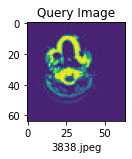

<Figure size 720x360 with 0 Axes>

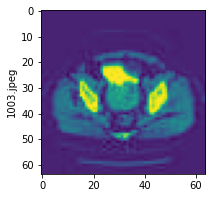

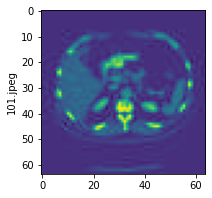

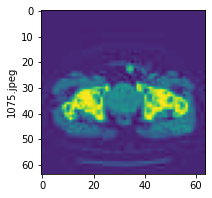

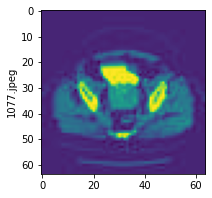

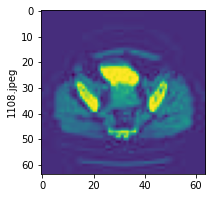

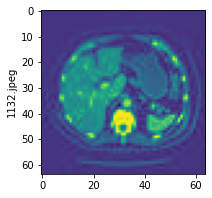

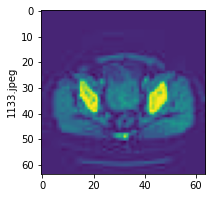

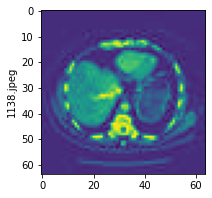

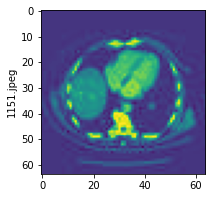

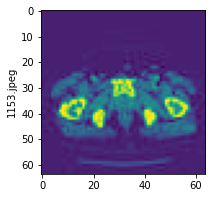

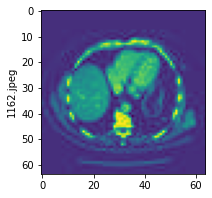

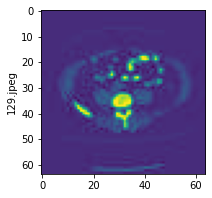

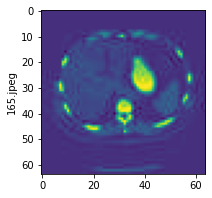

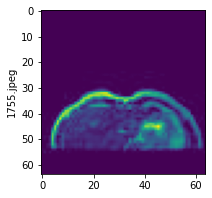

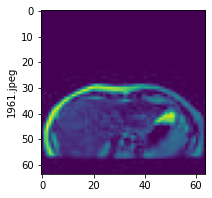

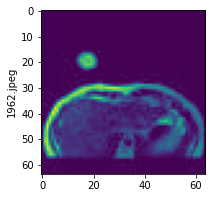

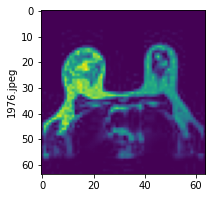

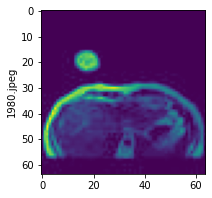

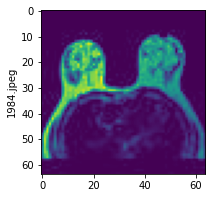

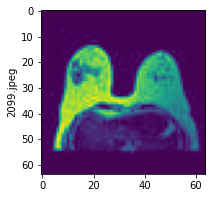

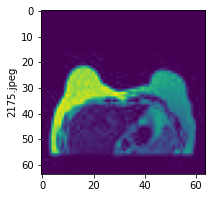

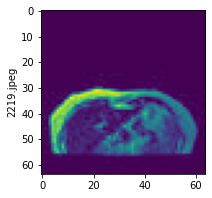

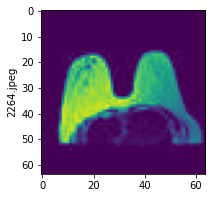

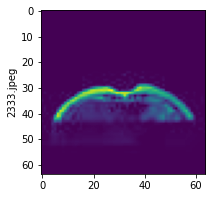

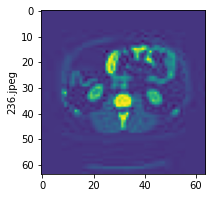

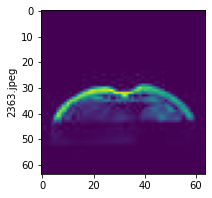

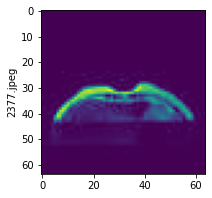

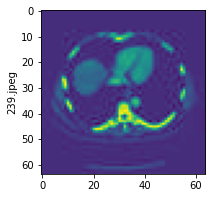

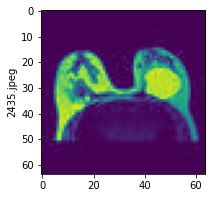

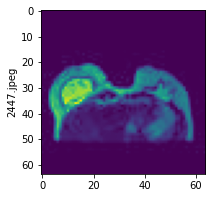

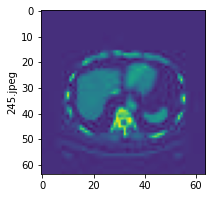

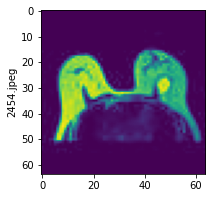

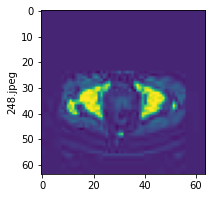

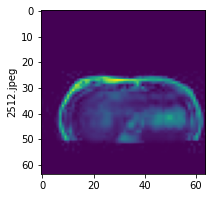

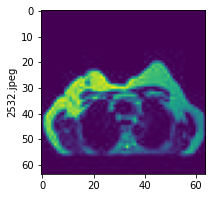

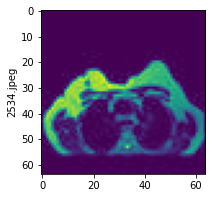

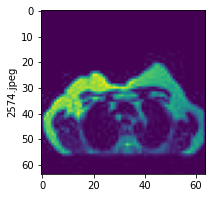

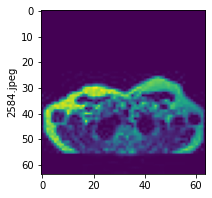

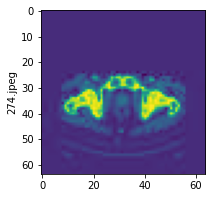

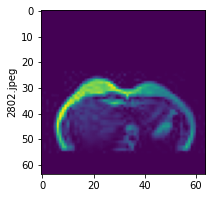

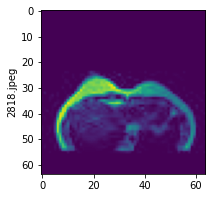

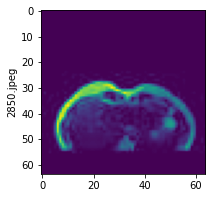

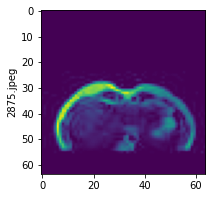

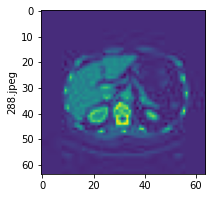

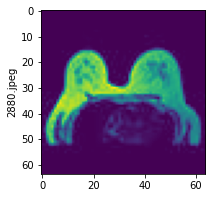

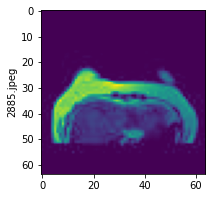

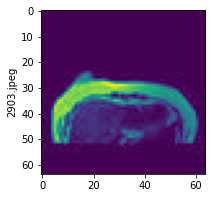

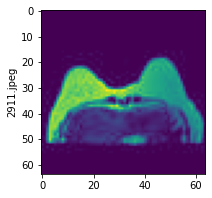

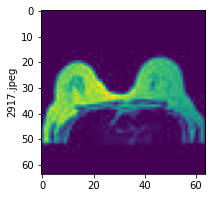

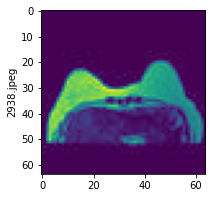

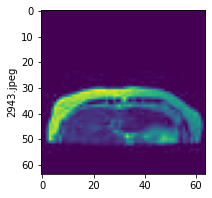

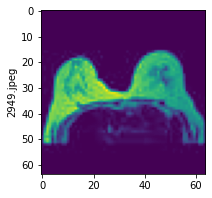

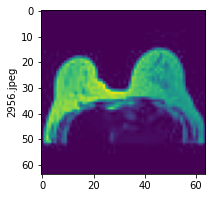

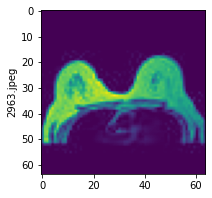

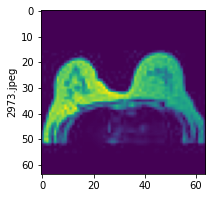

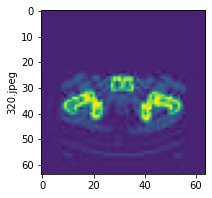

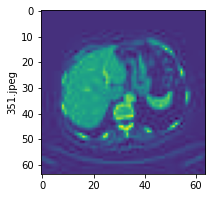

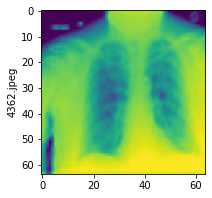

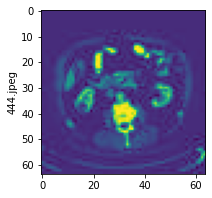

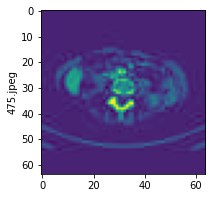

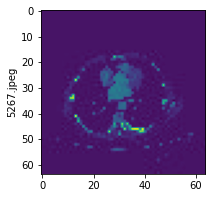

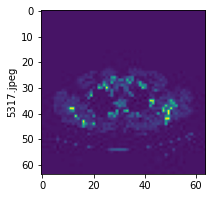

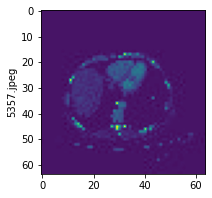

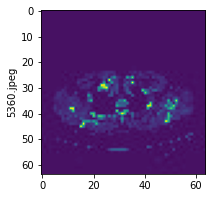

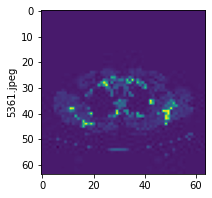

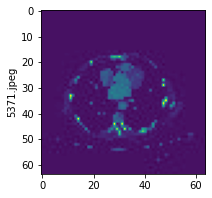

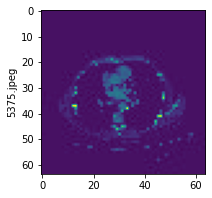

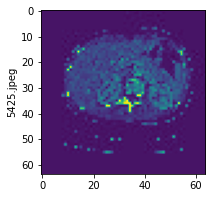

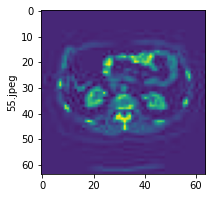

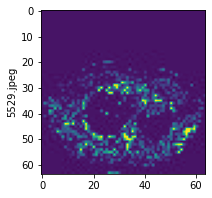

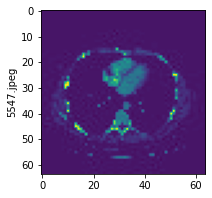

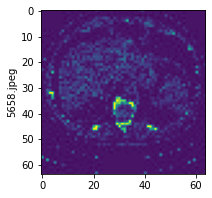

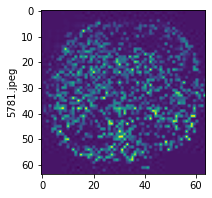

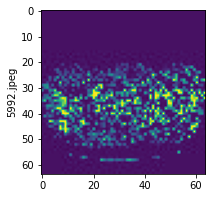

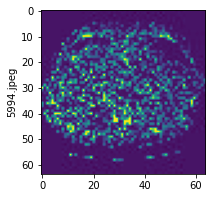

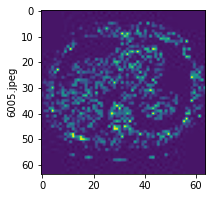

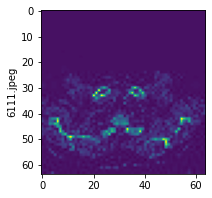

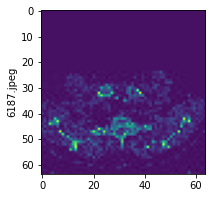

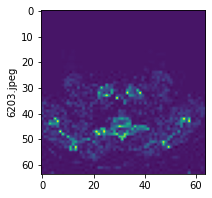

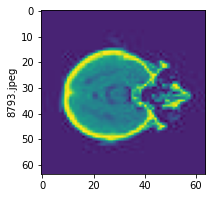

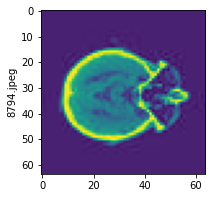

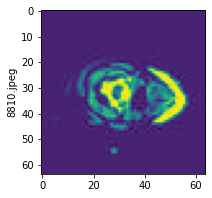

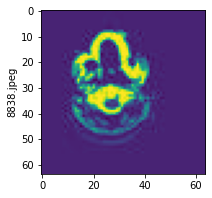

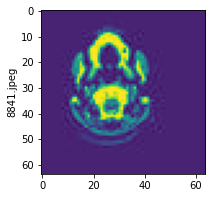

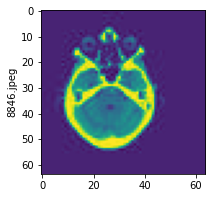

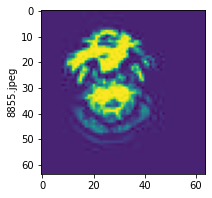

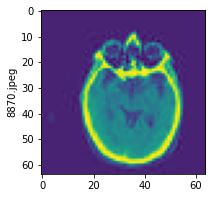

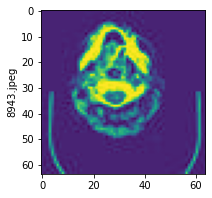

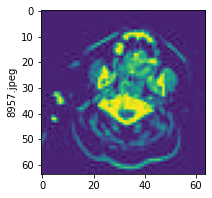

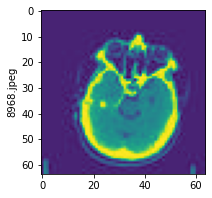

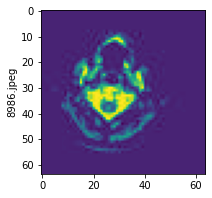

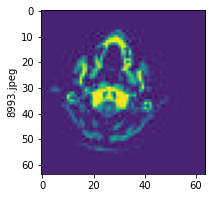

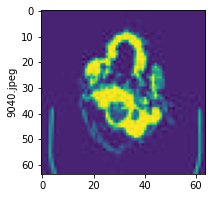

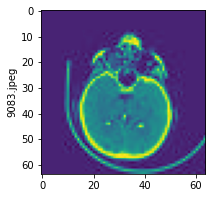

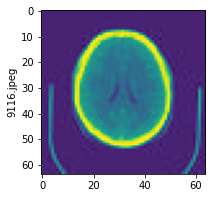

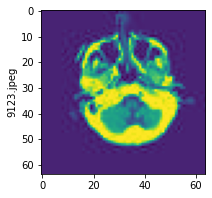

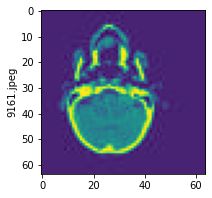

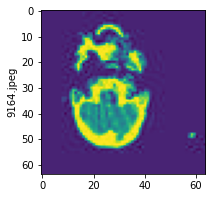

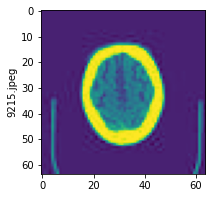

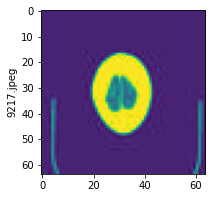

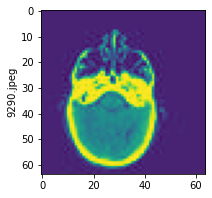

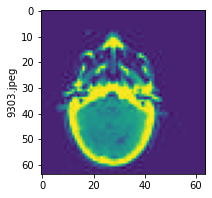

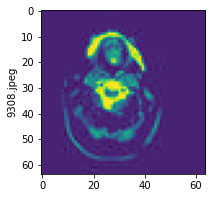

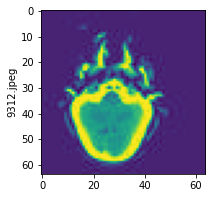

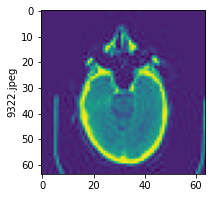

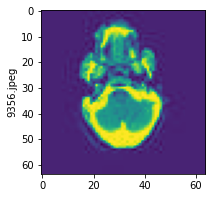

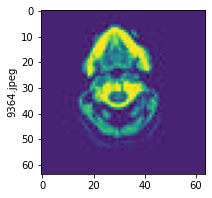

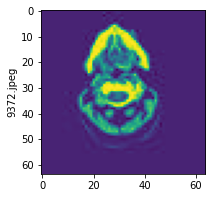

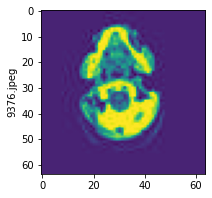

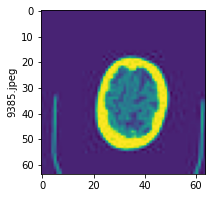

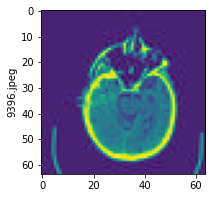

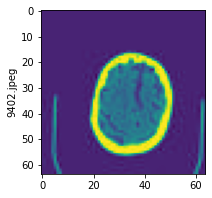

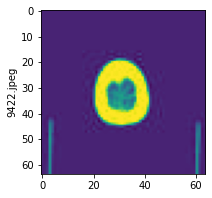

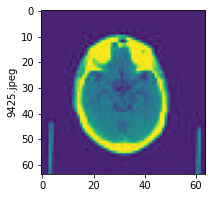

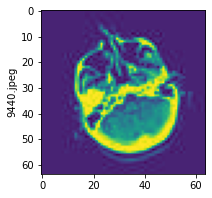

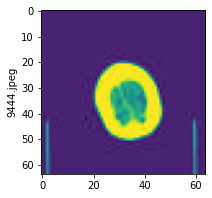

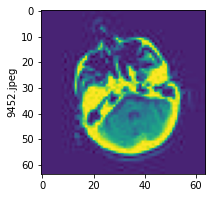

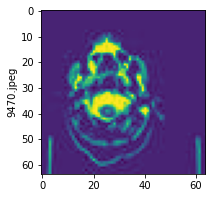

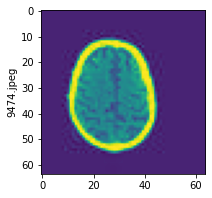

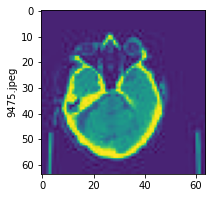

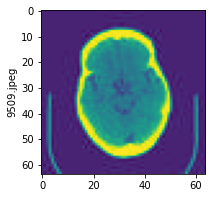

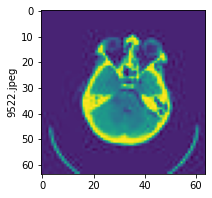

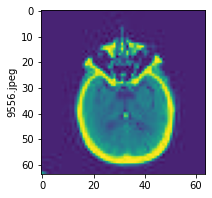

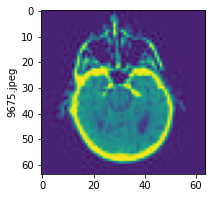

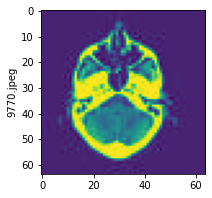

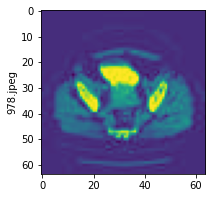

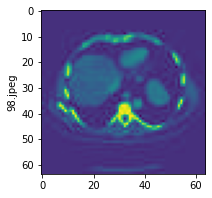

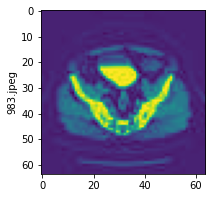

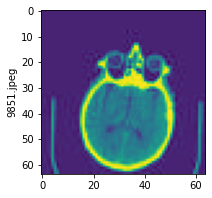

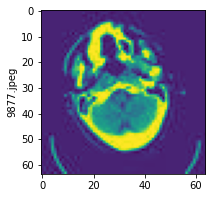

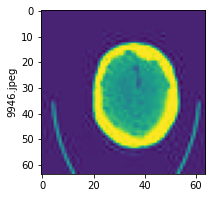

In [554]:
elapsed = time.time()-st
res = timeit.timeit(stmt='query()', globals=globals(), number=1)
print('CPU Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed)))
print('WALL Execution time:', time.strftime("%H:%M:%S", time.gmtime(res)))

In [555]:
my=[]
for t in range(len(retrieved_images)):
    my.append(cv2.imread(retrieved_images[t]))
    #my2= cv2.imread(retrieved_images[++t])
    vert = np.concatenate(my,axis=1)
    cv2.namedWindow('Target Image',cv2.WINDOW_AUTOSIZE)
    cv2.imshow('Target Image',vert)
    cv2.waitKey(5000)
cv2.waitKey(0)
cv2.destroyAllWindows()